<a href="https://colab.research.google.com/github/NBK-code/IMDB_Movie_Rating_Prediction/blob/main/IMDB_mrp_EDA_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Data Preprocessing

##2.1. Initial Exploration of Data

In [ ]:
df = pd.read_csv('/content/sample_data/movie_metadata.csv')

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.shape

(5043, 28)

In [ ]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

We have the following variables:

Categorical variables: 'color', 'director_name', 'actor_2_name','genres', 'actor_1_name', 'movie_title', 
       'actor_3_name', 'plot_keywords',
       'movie_imdb_link', 'language', 'country',
       'content_rating'.

Numerical variables: 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 
       'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'


##2.2. Initial Data Preprocessing

###2.2.1. Remove Unneccasary Columns

In [ ]:
#Most movies are in color.

df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [ ]:
df.drop(columns = ['color'], inplace = True )

In [ ]:
df.drop(columns = ['plot_keywords','movie_imdb_link'], inplace = True)

###2.2.2. Check Missing Values

In [ ]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

##2.3. Dealing with Categorical Variables

###2.3.1. Drop Rows with Missing Values

Missing values in categorical columns needs to be handled with care. There are different ways to deal with them. The two most popular ones are:

1. Delete rows with missing values
2. Fill in with the most frequent value

The second approach should be applied only after train-test split in order to avoid data leakage from test set to train set. However the first approach of deleting rows with missing columns does not lead to data leakage and hence can be done before train-test split.

For our case, we will follow the first approach. In doing so, we are not losing a lot of data.

(Later, we will deal with missing values in quantitative columns after train-test split.)


In [ ]:
df.dropna(subset = ['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name',
                    'country','language','content_rating','genres'], inplace = True)

In [ ]:
df.shape

(4659, 25)

We have lost 384 out of 5043 entries or about 7.6% of the data. This is within acceptable limits.

In [ ]:
df.isna().sum()

director_name                  0
num_critic_for_reviews        19
duration                       1
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        577
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          12
num_user_for_reviews           3
language                       0
country                        0
content_rating                 0
budget                       332
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 187
movie_facebook_likes           0
dtype: int64

In [ ]:
df.reset_index(drop = True, inplace = True)

###2.3.2. 'genres' Column

Let us encode 'genres' column. Note that most often there are multiple genres for each movie.

In [ ]:
movie_genres = df['genres']

In [ ]:
genres = []

for i in range(len(movie_genres)):
  genres += movie_genres[i].split('|')

genres_list = list(set(genres))
genres_list

['History',
 'Documentary',
 'Comedy',
 'Crime',
 'Mystery',
 'Music',
 'Fantasy',
 'Sport',
 'Thriller',
 'Biography',
 'Family',
 'Western',
 'Romance',
 'Drama',
 'Film-Noir',
 'Animation',
 'Adventure',
 'Action',
 'Sci-Fi',
 'Musical',
 'War',
 'Horror',
 'News']

In [ ]:
print("The total number of different genres:", len(genres_list))

The total number of different genres: 23


In [ ]:
movie_genres_dict = {}

for i in genres_list:
  movie_genres_dict[i] = []

for element in movie_genres:
  arr = list(set(element.split('|')))

  for key in movie_genres_dict:

    if key in arr:
     movie_genres_dict[key].append(1)
    else:
      movie_genres_dict[key].append(0)

In [ ]:
df_movie_genres = pd.DataFrame(data = movie_genres_dict)
df_movie_genres.head()

,History,Documentary,Comedy,Crime,Mystery,Music,Fantasy,Sport,Thriller,Biography,...,Drama,Film-Noir,Animation,Adventure,Action,Sci-Fi,Musical,War,Horror,News
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


Notice that this is not one-hot encoding as each movie could be simultaneously listed in different genres.

In [ ]:
df = pd.concat([df_movie_genres, df.drop('genres', axis = 1)], axis = 1)

In [ ]:
df.shape

(4659, 47)

###2.3.3. 'content_rating' Column

In [ ]:
df['content_rating'].value_counts()

R            2116
PG-13        1459
PG            697
G             110
Not Rated     110
Unrated        62
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-14           3
TV-PG           3
Name: content_rating, dtype: int64

We will one-hot encode only the top 4 categories (which account for more than 90% of the data). Notice that we are also avoiding dummy variable trap by not encoding all the other categories as 'Other_Ratings'.

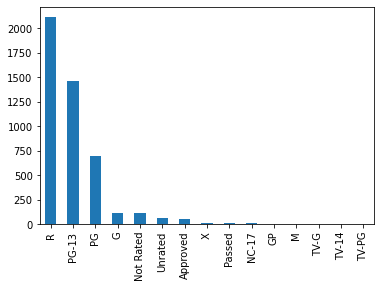

In [ ]:
df['content_rating'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
df = pd.concat([pd.get_dummies(df['content_rating'])[['R','PG-13','PG','G']], df.drop('content_rating', axis = 1)], axis = 1)

In [ ]:
df.head()

,R,PG-13,PG,G,History,Documentary,Comedy,Crime,Mystery,Music,...,facenumber_in_poster,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,1,0,0,0,0,0,0,0,0,...,0.0,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,1.78,33000
1,0,1,0,0,0,0,0,0,0,0,...,0.0,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,2.35,0
2,0,1,0,0,0,0,0,0,0,0,...,1.0,994.0,English,UK,245000000.0,2015.0,393.0,6.8,2.35,85000
3,0,1,0,0,0,0,0,0,0,0,...,0.0,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,0,1,0,0,0,0,0,0,0,0,...,1.0,738.0,English,USA,263700000.0,2012.0,632.0,6.6,2.35,24000


###2.3.4. 'language' Column

In [ ]:
df['language'].value_counts()

English       4420
French          50
Spanish         36
Mandarin        22
Hindi           15
German          15
Japanese        13
Cantonese        8
Portuguese       8
Italian          8
Russian          7
Korean           7
Danish           5
Persian          4
Hebrew           4
Norwegian        4
Dutch            3
Thai             3
Dari             2
Arabic           2
Swedish          2
None             2
Zulu             2
Aboriginal       2
Indonesian       2
Romanian         1
Polish           1
Vietnamese       1
Mongolian        1
Czech            1
Hungarian        1
Bosnian          1
Chinese          1
Aramaic          1
Kazakh           1
Maya             1
Filipino         1
Greek            1
Name: language, dtype: int64

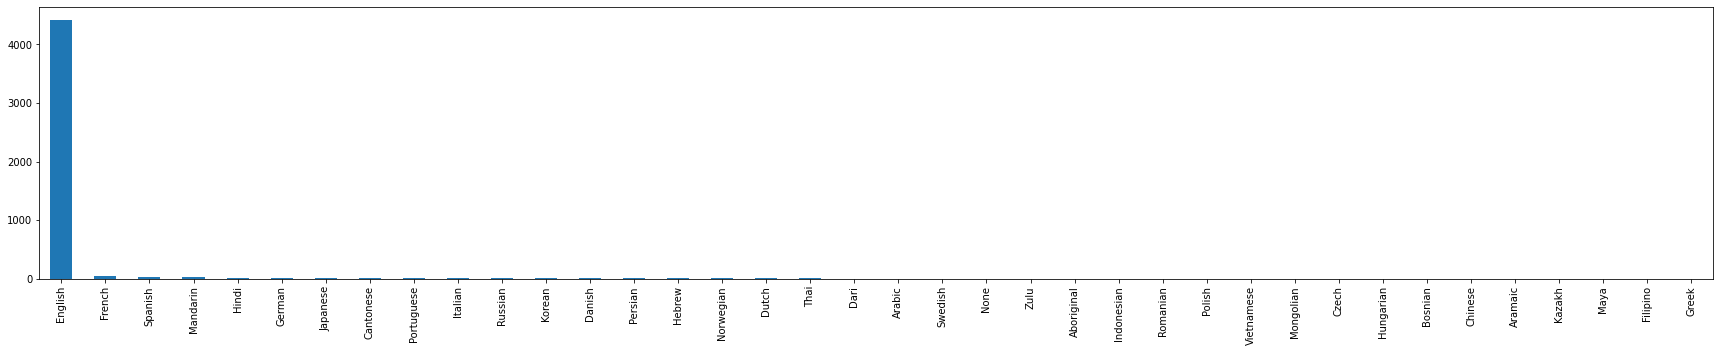

In [ ]:
df['language'].value_counts().plot(kind = 'bar', figsize=(30,5))
plt.show()

Most of the movies are in English. So we can drop the 'language' column.

In [ ]:
df.drop(columns = ['language'], inplace = True )

###2.3.5. 'country' Column

In [ ]:
df['country'].value_counts()

USA                   3587
UK                     415
France                 130
Canada                 109
Germany                 93
Australia               51
Spain                   32
China                   21
Japan                   18
Italy                   18
Hong Kong               16
Mexico                  15
India                   14
New Zealand             13
Denmark                 11
South Korea             11
Ireland                 11
South Africa             8
Norway                   7
Brazil                   7
Russia                   7
Thailand                 5
Argentina                4
Netherlands              4
Iran                     4
Israel                   3
Belgium                  3
Romania                  3
West Germany             3
Czech Republic           3
Sweden                   3
Greece                   2
Hungary                  2
Poland                   2
Taiwan                   2
Colombia                 1
Aruba                    1
E

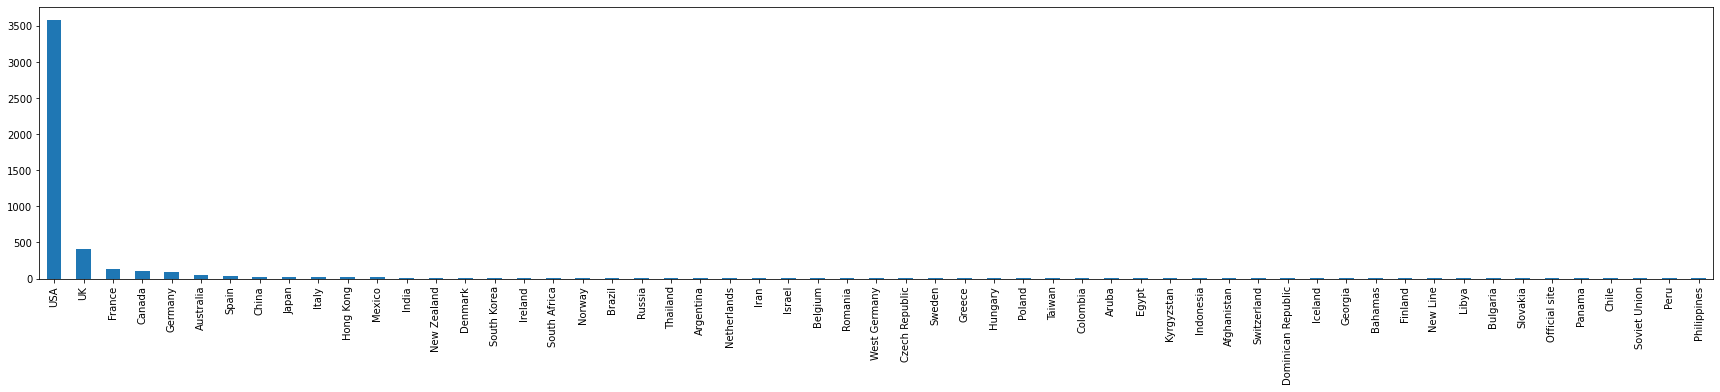

In [ ]:
df['country'].value_counts().plot(kind = 'bar', figsize=(30,5))
plt.show()

We will one-hot encode only the top 4 categories.

In [ ]:
df = pd.concat([pd.get_dummies(df['country'])[['USA','UK','France','Canada']], df.drop('country', axis = 1)], axis = 1)

In [ ]:
df.head()

,USA,UK,France,Canada,R,PG-13,PG,G,History,Documentary,...,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,0,0,0,0,1,0,0,0,0,...,4834,Wes Studi,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,1,0,0,0,0,1,0,0,0,0,...,48350,Jack Davenport,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,0,1,0,0,0,1,0,0,0,0,...,11700,Stephanie Sigman,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,1,0,0,0,0,1,0,0,0,0,...,106759,Joseph Gordon-Levitt,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,1,0,0,0,0,1,0,0,0,0,...,1873,Polly Walker,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


###2.3.6. Other Categorical Columns

In [ ]:
df['director_name'].value_counts()

Steven Spielberg      26
Woody Allen           22
Clint Eastwood        20
Martin Scorsese       20
Ridley Scott          17
                      ..
Shintaro Shimosawa     1
Dean Wright            1
Floyd Mutrux           1
Léa Pool               1
Daniel Hsia            1
Name: director_name, Length: 2171, dtype: int64

In [ ]:
df['actor_1_name'].value_counts()

Robert De Niro     49
Johnny Depp        41
Nicolas Cage       33
J.K. Simmons       31
Bruce Willis       30
                   ..
Kim Director        1
Jessie T. Usher     1
Jack Davenport      1
Rae'Ven Kelly       1
John August         1
Name: actor_1_name, Length: 1858, dtype: int64

In [ ]:
df['actor_2_name'].value_counts()

Morgan Freeman       20
Charlize Theron      15
Brad Pitt            14
Meryl Streep         11
James Franco         11
                     ..
Keanu Reeves          1
Ty Olsson             1
Demián Bichir         1
Ricardo Montalban     1
Brian Herzlinger      1
Name: actor_2_name, Length: 2745, dtype: int64

In [ ]:
df['actor_3_name'].value_counts()

John Heard        8
Ben Mendelsohn    8
Steve Coogan      8
Lois Maxwell      7
Anne Hathaway     7
                 ..
Jeff Perry        1
Romi Aboulafia    1
Margaret Cho      1
Jasper Levine     1
Jon Gunn          1
Name: actor_3_name, Length: 3236, dtype: int64

We see that in order to encode the most frequent categories of 'director_name', 'actor_1_name', 'actor_2_name', and 'actor_3_name' that covers at least 90% of data requires a lot of features. This leads to curse of dimensionality. Therefore let us drop these columns from the data.

In [ ]:
df.drop(columns = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name'], inplace = True )

We will also drop 'movie_title' as each movie title is unique and one can expect that the correlation between the movie title and imdb score to be very small.

In [ ]:
df.drop(columns = ['movie_title'], inplace = True )

In [ ]:
df.columns

Index(['USA', 'UK', 'France', 'Canada', 'R', 'PG-13', 'PG', 'G', 'History',
       'Documentary', 'Comedy', 'Crime', 'Mystery', 'Music', 'Fantasy',
       'Sport', 'Thriller', 'Biography', 'Family', 'Western', 'Romance',
       'Drama', 'Film-Noir', 'Animation', 'Adventure', 'Action', 'Sci-Fi',
       'Musical', 'War', 'Horror', 'News', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [ ]:
df.shape

(4659, 47)

###2.3.7. Check all categorical variables have been encoded

In [ ]:
pd.Series(list(df.dtypes)).unique()

array([dtype('uint8'), dtype('int64'), dtype('float64')], dtype=object)

No 'object' dtype indicates all categorical variables have been encoded.

Now that we have dealt with all the categorical variables, let us move on to quantitative variables.

##2.4. Dealing with Quantitative Variables

###2.4.1. Initial Data Processing

There are still missing values in the quantitative variables that we need to deal with.

In [ ]:
df.isna().sum()

USA                            0
UK                             0
France                         0
Canada                         0
R                              0
PG-13                          0
PG                             0
G                              0
History                        0
Documentary                    0
Comedy                         0
Crime                          0
Mystery                        0
Music                          0
Fantasy                        0
Sport                          0
Thriller                       0
Biography                      0
Family                         0
Western                        0
Romance                        0
Drama                          0
Film-Noir                      0
Animation                      0
Adventure                      0
Action                         0
Sci-Fi                         0
Musical                        0
War                            0
Horror                         0
News      

In [ ]:
df = df[['USA','UK','France','Canada','R','PG-13','PG','G','History','Documentary','Comedy','Crime','Mystery','Music','Fantasy','Sport','Thriller',
         'Biography','Family','Western','Romance','Drama','Film-Noir','Animation','Adventure','Action','Sci-Fi','Musical','War','Horror','News',
         'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users',
         'cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','title_year','actor_2_facebook_likes',
         'aspect_ratio','movie_facebook_likes','imdb_score']]

In [ ]:
df.head()

,USA,UK,France,Canada,R,PG-13,PG,G,History,Documentary,...,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,1,0,0,0,0,1,0,0,0,0,...,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000,7.9
1,1,0,0,0,0,1,0,0,0,0,...,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0,7.1
2,0,1,0,0,0,1,0,0,0,0,...,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,2.35,85000,6.8
3,1,0,0,0,0,1,0,0,0,0,...,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,2.35,164000,8.5
4,1,0,0,0,0,1,0,0,0,0,...,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,2.35,24000,6.6


###2.4.2. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train_pd, rest_pd = train_test_split(df, test_size=0.2)

val_pd, test_pd = train_test_split(rest_pd, test_size=0.5)

len(train_pd), len(test_pd), len(val_pd)

(3727, 466, 466)

###2.4.3. Fill in Missing Values

Now let us fill in the missing values of quantitative variables (in train, test and val datasets) using either mode or median of the variables in the training data. Using only the training data to fill in train, test and val datasets is done to avoid data leakage.

In [ ]:
train_pd["aspect_ratio"].mode()

0    2.35
dtype: float64

In [ ]:
train_pd["aspect_ratio"].fillna(2.35, inplace=True)
test_pd["aspect_ratio"].fillna(2.35, inplace=True)
val_pd["aspect_ratio"].fillna(2.35, inplace=True)

In [ ]:
train_pd["budget"].median()

20000000.0

In [ ]:
train_pd["budget"].fillna(20000000.0, inplace=True)
test_pd["budget"].fillna(20000000.0, inplace=True)
val_pd["budget"].fillna(20000000.0, inplace=True)

In [ ]:
train_pd["num_user_for_reviews"].median()

173.0

In [ ]:
train_pd["num_user_for_reviews"].fillna(173.0, inplace=True)
test_pd["num_user_for_reviews"].fillna(173.0, inplace=True)
val_pd["num_user_for_reviews"].fillna(173.0, inplace=True)

In [ ]:
train_pd["num_critic_for_reviews"].median()

121.0

In [ ]:
train_pd["num_critic_for_reviews"].fillna(121.0, inplace=True)
test_pd["num_critic_for_reviews"].fillna(121.0, inplace=True)
val_pd["num_critic_for_reviews"].fillna(121.0, inplace=True)

In [ ]:
train_pd["gross"].median()

25787552.5

In [ ]:
train_pd["gross"].fillna(25787552.5, inplace=True)
test_pd["gross"].fillna(25787552.5, inplace=True)
val_pd["gross"].fillna(25787552.5, inplace=True)

In [ ]:
train_pd["facenumber_in_poster"].median()

1.0

In [ ]:
train_pd["facenumber_in_poster"].fillna(1.0, inplace=True)
test_pd["facenumber_in_poster"].fillna(1.0, inplace=True)
val_pd["facenumber_in_poster"].fillna(1.0, inplace=True)

In [ ]:
train_pd["duration"].median()

104.0

In [ ]:
train_pd["duration"].fillna(104.0, inplace=True)
test_pd["duration"].fillna(104.0, inplace=True)
val_pd["duration"].fillna(104.0, inplace=True)

Check there are no more missing values in quantitative variables in train, test and val dataset.

In [ ]:
sum(train_pd.isna().sum())

0

In [ ]:
sum(test_pd.isna().sum())

0

In [ ]:
sum(val_pd.isna().sum())

0

###2.4.4. Descriptive Statistics of Quantitative Variables

There are 16 quantitative variables.

In [ ]:
train_pd[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users',
         'cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','title_year','actor_2_facebook_likes',
         'aspect_ratio','movie_facebook_likes','imdb_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3727.0,1.497813e+02,1.214613e+02,1.00,61.00,121.00,204.00,8.130000e+02
duration,3727.0,1.087695e+02,2.255293e+01,20.00,94.00,104.00,118.00,3.300000e+02
director_facebook_likes,3727.0,7.441454e+02,2.941248e+03,0.00,9.00,54.00,213.00,2.300000e+04
actor_3_facebook_likes,3727.0,6.956160e+02,1.807299e+03,0.00,152.00,393.00,650.00,2.300000e+04
actor_1_facebook_likes,3727.0,6.962479e+03,1.545720e+04,0.00,658.50,1000.00,12000.00,6.400000e+05
gross,3727.0,4.669136e+07,6.507876e+07,162.00,8000000.00,25787552.50,55805749.00,7.605058e+08
num_voted_users,3727.0,9.087595e+04,1.449152e+05,6.00,11698.50,39857.00,105694.00,1.689764e+06
cast_total_facebook_likes,3727.0,1.029154e+04,1.840865e+04,0.00,1585.50,3301.00,14622.50,6.567300e+05
facenumber_in_poster,3727.0,1.365173e+00,1.983967e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,3727.0,2.944969e+02,3.923899e+02,1.00,79.00,173.00,348.50,5.060000e+03


###2.4.5. Joint Plots of IMDB_Score and Other Quantitative Variables

We will make use of joint plots to determine whether a particular quantitative variable is useful to predict imdb score or not.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

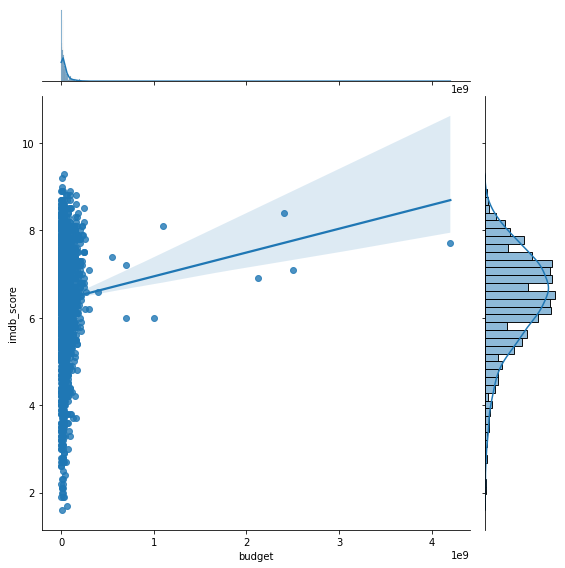

In [ ]:
sns.jointplot(x='budget', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('budget')
plt.ylabel('imdb_score')

In [ ]:
train_low_budget_movies = train_pd.loc[train_pd['budget']<500000000.0][['budget','imdb_score']]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

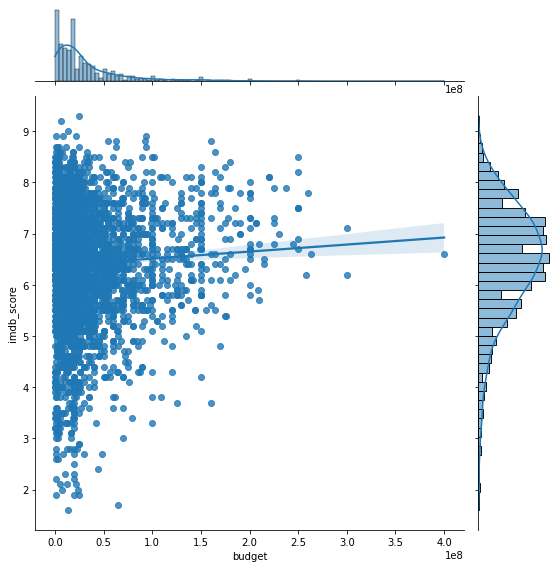

In [ ]:
sns.jointplot(x='budget', y='imdb_score', data=train_low_budget_movies, kind='reg', size=8)
plt.xlabel('budget')
plt.ylabel('imdb_score')

We notice that: 1) many movies are low-bidget movies, 2) IMDB score for high-budget movies are medium to high.

So it makes sense to include 'budget' in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

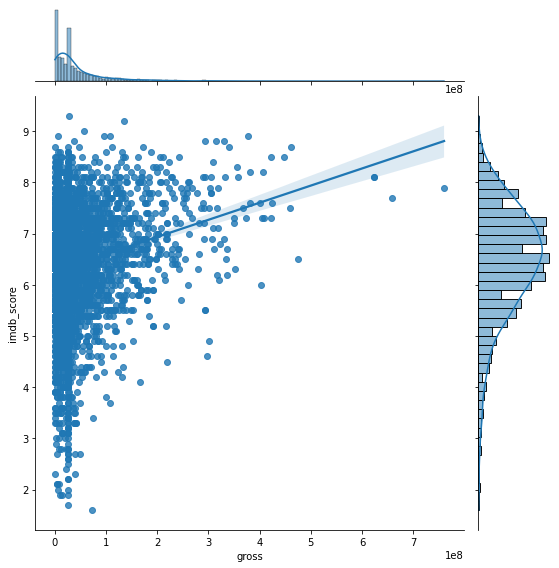

In [ ]:
sns.jointplot(x='gross', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('gross')
plt.ylabel('imdb_score')

High gross movies have better IMDB score. We will include gross as well in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

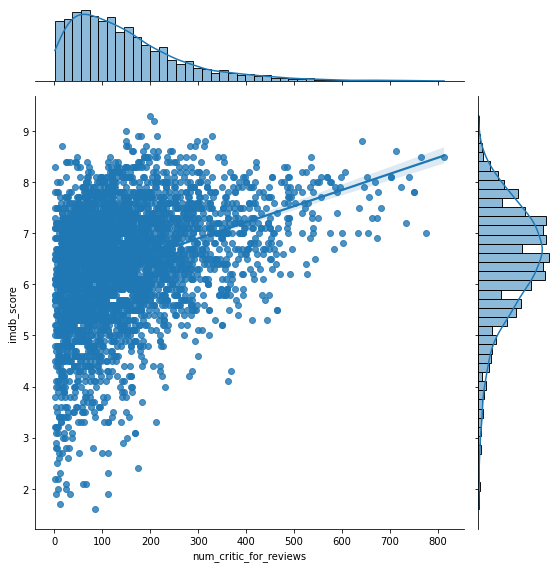

In [ ]:
sns.jointplot(x='num_critic_for_reviews', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('num_critic_for_reviews')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

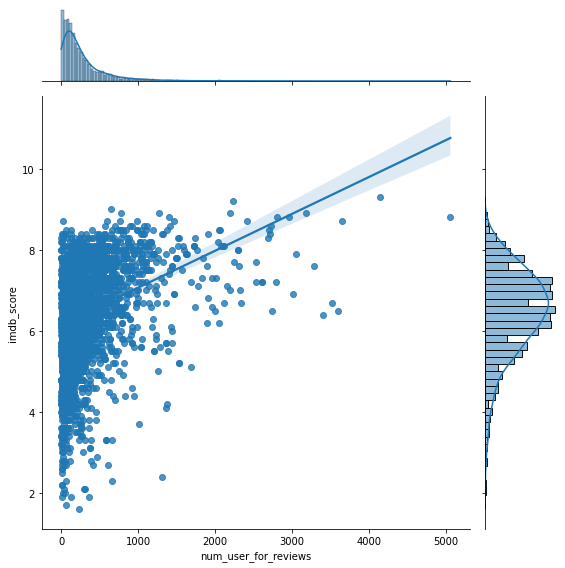

In [ ]:
sns.jointplot(x='num_user_for_reviews', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('num_user_for_reviews')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

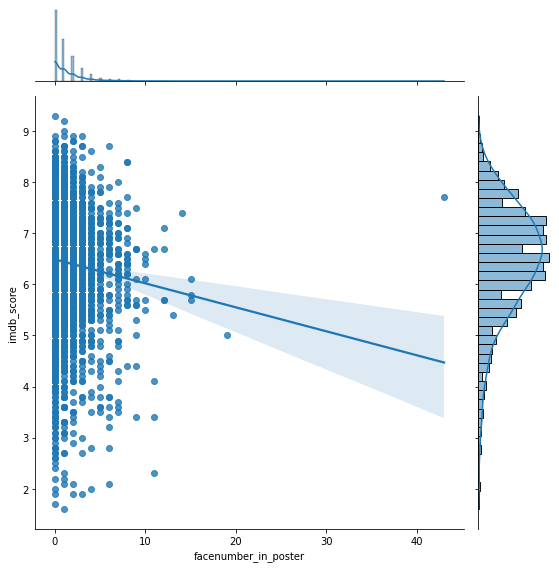

In [ ]:
sns.jointplot(x='facenumber_in_poster', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('facenumber_in_poster')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

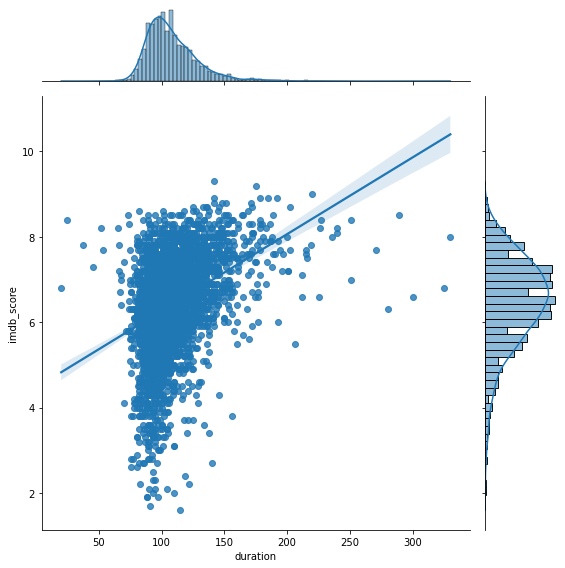

In [ ]:
sns.jointplot(x='duration', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('duration')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

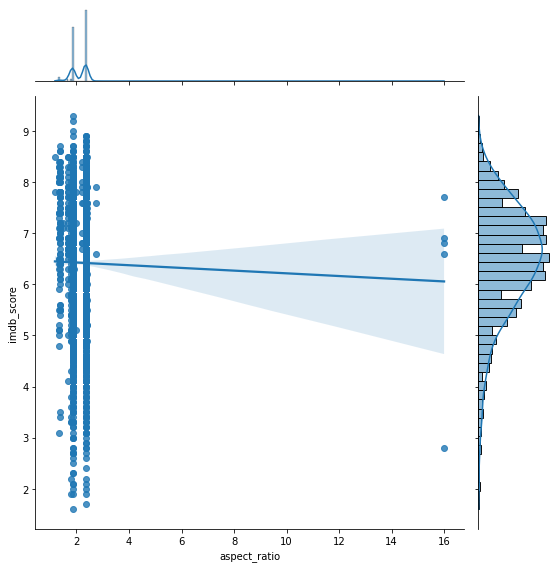

In [ ]:
sns.jointplot(x='aspect_ratio', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('aspect_ratio')
plt.ylabel('imdb_score')

We can see that aspect_ratio can be safely ignored.

In [ ]:
train_pd.drop(columns = ['aspect_ratio'], inplace = True)
test_pd.drop(columns = ['aspect_ratio'], inplace = True)
val_pd.drop(columns = ['aspect_ratio'], inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

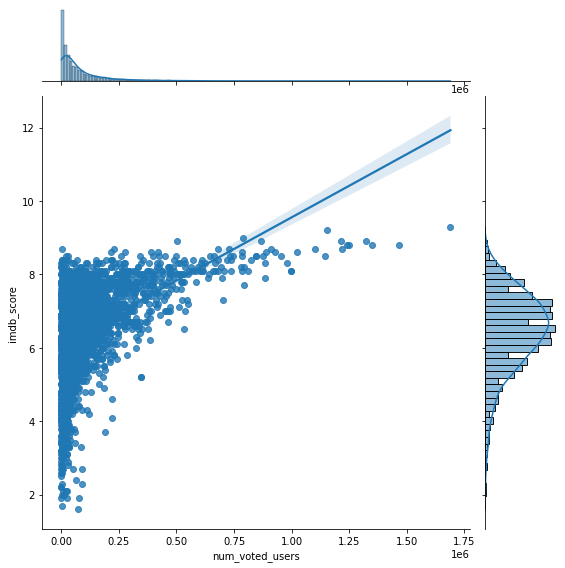

In [ ]:
sns.jointplot(x='num_voted_users', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('num_voted_users')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

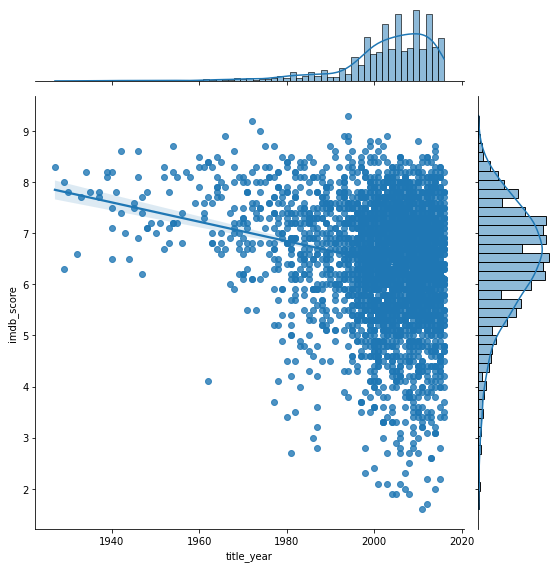

In [ ]:
sns.jointplot(x='title_year', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('title_year')
plt.ylabel('imdb_score')

We can drop title_year.

In [ ]:
train_pd.drop(columns = ['title_year'], inplace = True)
test_pd.drop(columns = ['title_year'], inplace = True)
val_pd.drop(columns = ['title_year'], inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

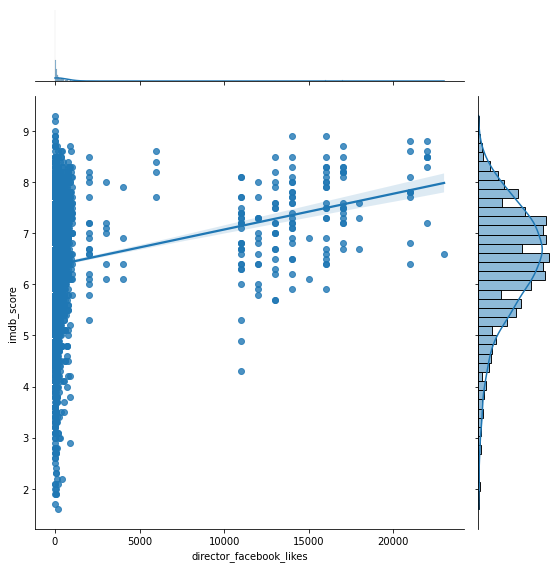

In [ ]:
sns.jointplot(x='director_facebook_likes', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('director_facebook_likes')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

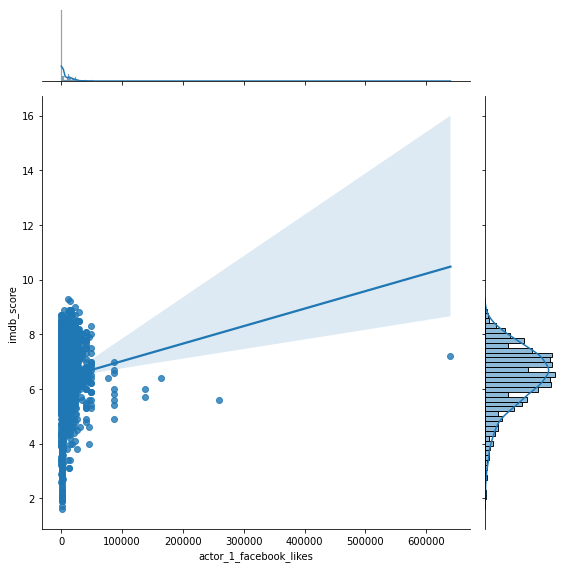

In [ ]:
sns.jointplot(x='actor_1_facebook_likes', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('actor_1_facebook_likes')
plt.ylabel('imdb_score')

In [ ]:
train_actor_1_with_low_fb_likes = train_pd.loc[train_pd['actor_1_facebook_likes']<100000.0][['actor_1_facebook_likes','imdb_score']]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

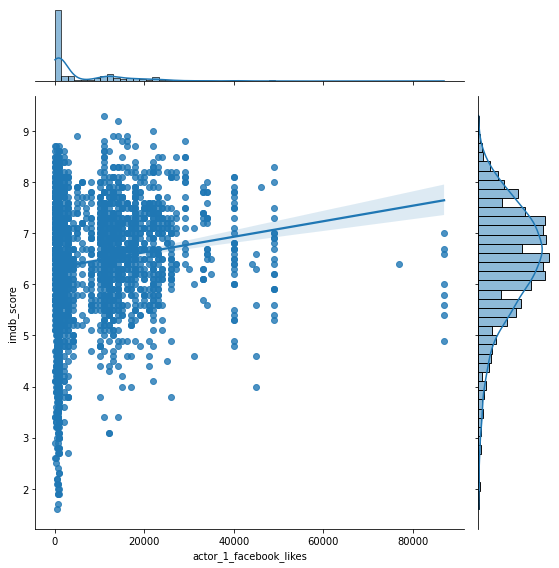

In [ ]:
sns.jointplot(x='actor_1_facebook_likes', y='imdb_score', data=train_actor_1_with_low_fb_likes, kind='reg', size=8)
plt.xlabel('actor_1_facebook_likes')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

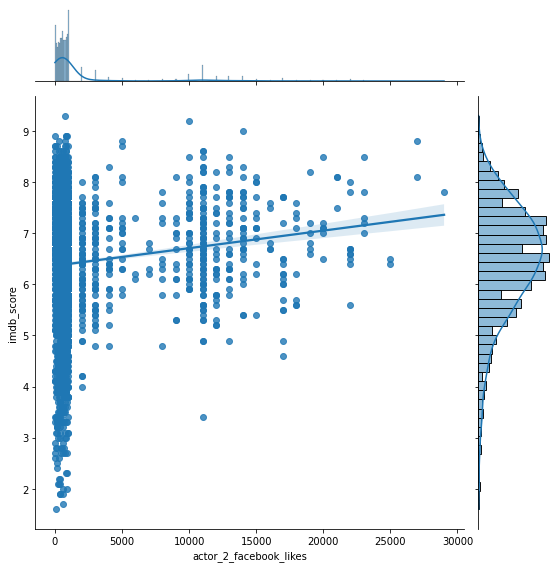

In [ ]:
sns.jointplot(x='actor_2_facebook_likes', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('actor_2_facebook_likes')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

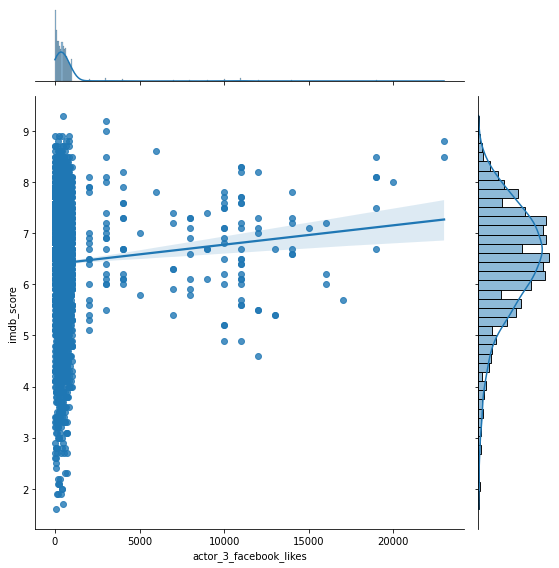

In [ ]:
sns.jointplot(x='actor_3_facebook_likes', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('actor_3_facebook_likes')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

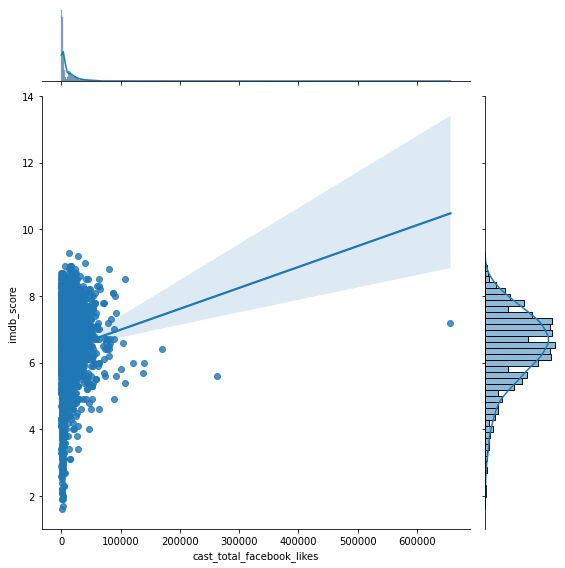

In [ ]:
sns.jointplot(x='cast_total_facebook_likes', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('cast_total_facebook_likes')
plt.ylabel('imdb_score')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'imdb_score')

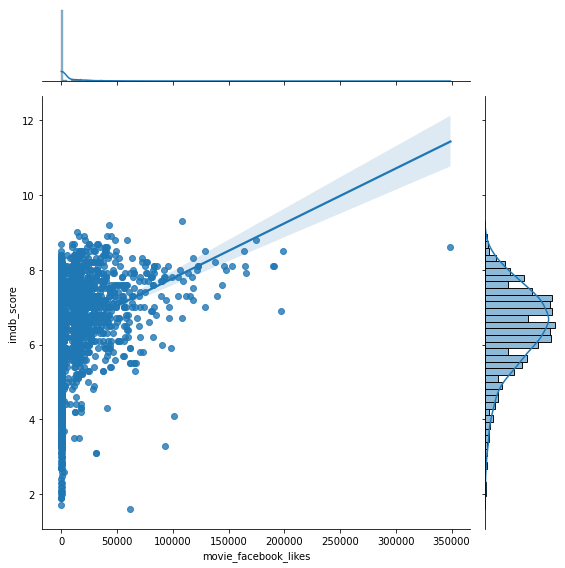

In [ ]:
sns.jointplot(x='movie_facebook_likes', y='imdb_score', data=train_pd, kind='reg', size=8)
plt.xlabel('movie_facebook_likes')
plt.ylabel('imdb_score')

We have analyzed all the 15 quantitative variables in a jointplot with IMDB score. We are retaining all except for aspect_ratio and title_year.

###2.4.6. Remove Correlated Variables

Generate correlation matrix to check for multicollinearity. A correlation of >0.7 between two variables indicate high linear dependence between them. In such a case, we will remove one of the variables.

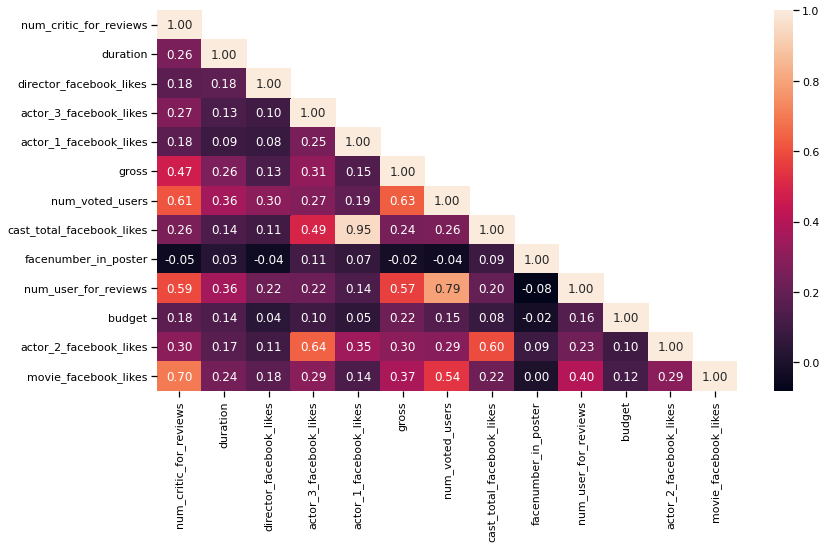

In [ ]:
corr = train_pd[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross',
                'num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes',
                'movie_facebook_likes']].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'cast_total_facebook_likes')

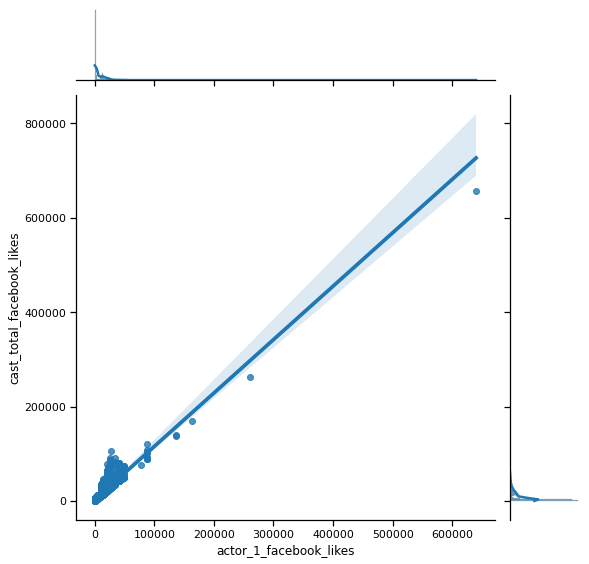

In [ ]:
sns.jointplot(x='actor_1_facebook_likes', y='cast_total_facebook_likes', data=train_pd, kind='reg', size=8)
plt.xlabel('actor_1_facebook_likes')
plt.ylabel('cast_total_facebook_likes')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(450.6285714285715, 0.5, 'num_user_for_reviews')

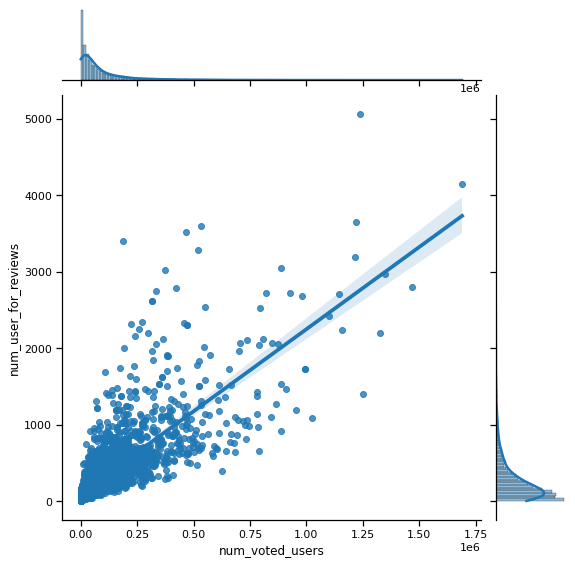

In [ ]:
sns.jointplot(x='num_voted_users', y='num_user_for_reviews', data=train_pd, kind='reg', size=8)
plt.xlabel('num_voted_users')
plt.ylabel('num_user_for_reviews')

We see that actor_1_facebook_likes and cast_total_facebook_likes are highly correlated. So we will remove cast_total_facebook_likes from the datasets. We also see a high correlation between num_voted_users and num_user_for_reviews. We will remove num_user_for_reviews.

In [ ]:
train_pd.drop(columns = ['cast_total_facebook_likes','num_user_for_reviews'], inplace = True)
test_pd.drop(columns = ['cast_total_facebook_likes','num_user_for_reviews'], inplace = True)
val_pd.drop(columns = ['cast_total_facebook_likes','num_user_for_reviews'], inplace = True)

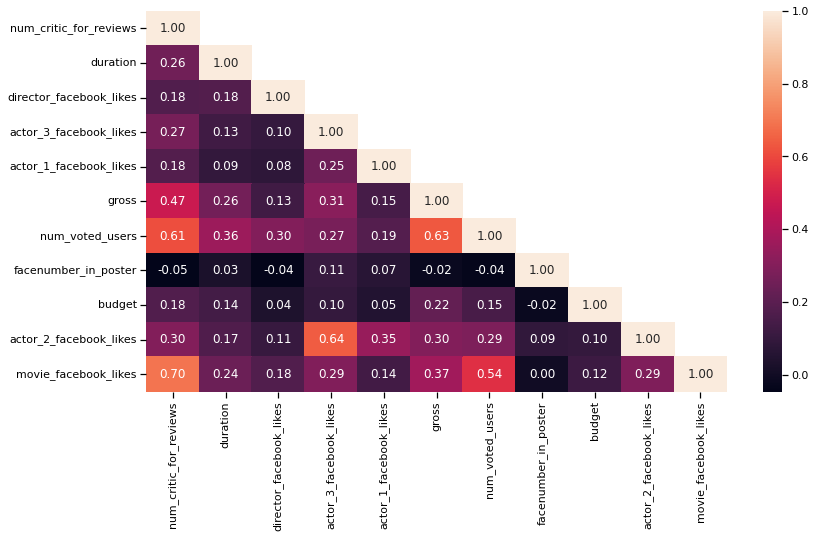

In [ ]:
corr = train_pd[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross',
                'num_voted_users','facenumber_in_poster','budget','actor_2_facebook_likes',
                'movie_facebook_likes']].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

Now we have datasets that doesn't have much correlation between the predictors.

In [ ]:
train_pd.head()

,USA,UK,France,Canada,R,PG-13,PG,G,History,Documentary,...,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,actor_2_facebook_likes,movie_facebook_likes,imdb_score
4338,1,0,0,0,1,0,0,0,0,0,...,4.0,150.0,446.0,62480.0,1048,1.0,1000000.0,171.0,793,5.5
30,1,0,0,0,0,1,0,0,0,0,...,0.0,4000.0,24000.0,373377893.0,411164,1.0,200000000.0,11000.0,0,7.3
1575,1,0,0,0,0,1,0,0,0,0,...,64.0,329.0,11000.0,63536011.0,34258,2.0,30000000.0,7000.0,0,6.3
936,1,0,0,0,1,0,0,0,0,0,...,160.0,443.0,20000.0,70496802.0,791783,1.0,54000000.0,979.0,48000,8.2
4145,0,0,0,0,1,0,0,0,0,0,...,670.0,34.0,486.0,7267324.0,161471,1.0,3500000.0,37.0,0,7.8


###2.4.7. Scaling and Normalization of Quantitative Variables

In [ ]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3727, 42), (3727,), (466, 42), (466,), (466, 42), (466,))

We will use Powertransformer from sklearn to scale and normalize the quantitative variables. Usually StandardScalar is used for this purpose. We are consciously using Powertransformer as it is better suited for skewed distributions. (One can see from the various joint plots in the previous subsection that all the quantitative variables have highly skewed distributions.)

In [ ]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer().fit(X_train[:,-11:])

def preprocessor(X):
  A = np.copy(X)
  A[:,-11:] = power.transform(A[:,-11:])
  return A

X_train_scaled, X_val_scaled, X_test_scaled = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

###2.4.8. Convert to Data Frames

In [ ]:
train_pd.columns

Index(['USA', 'UK', 'France', 'Canada', 'R', 'PG-13', 'PG', 'G', 'History',
       'Documentary', 'Comedy', 'Crime', 'Mystery', 'Music', 'Fantasy',
       'Sport', 'Thriller', 'Biography', 'Family', 'Western', 'Romance',
       'Drama', 'Film-Noir', 'Animation', 'Adventure', 'Action', 'Sci-Fi',
       'Musical', 'War', 'Horror', 'News', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes', 'imdb_score'],
      dtype='object')

In [ ]:
X_train_pd = pd.DataFrame(data = X_train_scaled, 
                          columns = ['USA', 'UK', 'France', 'Canada', 'R', 'PG-13', 'PG', 'G', 'History',
       'Documentary', 'Comedy', 'Crime', 'Mystery', 'Music', 'Fantasy',
       'Sport', 'Thriller', 'Biography', 'Family', 'Western', 'Romance',
       'Drama', 'Film-Noir', 'Animation', 'Adventure', 'Action', 'Sci-Fi',
       'Musical', 'War', 'Horror', 'News', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes'])

In [ ]:
y_train_pd = pd.DataFrame(data = y_train, columns = ['imdb_score'])

In [ ]:
X_test_pd = pd.DataFrame(data = X_test_scaled, 
                          columns = ['USA', 'UK', 'France', 'Canada', 'R', 'PG-13', 'PG', 'G', 'History',
       'Documentary', 'Comedy', 'Crime', 'Mystery', 'Music', 'Fantasy',
       'Sport', 'Thriller', 'Biography', 'Family', 'Western', 'Romance',
       'Drama', 'Film-Noir', 'Animation', 'Adventure', 'Action', 'Sci-Fi',
       'Musical', 'War', 'Horror', 'News', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes'])

In [ ]:
y_test_pd = pd.DataFrame(data = y_test, columns = ['imdb_score'])

In [ ]:
X_val_pd = pd.DataFrame(data = X_val_scaled, 
                          columns = ['USA', 'UK', 'France', 'Canada', 'R', 'PG-13', 'PG', 'G', 'History',
       'Documentary', 'Comedy', 'Crime', 'Mystery', 'Music', 'Fantasy',
       'Sport', 'Thriller', 'Biography', 'Family', 'Western', 'Romance',
       'Drama', 'Film-Noir', 'Animation', 'Adventure', 'Action', 'Sci-Fi',
       'Musical', 'War', 'Horror', 'News', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes'])

In [ ]:
y_val_pd = pd.DataFrame(data = y_val, columns = ['imdb_score'])

In [ ]:
X_train_pd

,USA,UK,France,Canada,R,PG-13,PG,G,History,Documentary,...,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,actor_2_facebook_likes,movie_facebook_likes
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.498952,-0.913619,-0.520577,-0.824608,-1.963551,-1.720132,0.283456,-1.663723,-0.799471,0.590718
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.251562,-1.610674,2.235354,1.468370,2.521017,1.767974,0.283456,2.133861,2.128717,-1.051257
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.329754,0.170832,0.027888,0.987340,0.715569,-0.074789,0.860275,0.325623,1.772617,-1.051257
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.138383,0.546689,0.252142,1.354480,0.801017,2.382668,0.283456,0.818355,0.334583,1.415094
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.534721,1.130255,-1.399331,-0.779355,-0.644141,0.991469,0.283456,-1.074267,-1.688927,-1.051257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.090461,1.034475,0.604046,1.253722,0.908140,0.665214,0.283456,0.183568,0.246717,1.180534
3723,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.138383,0.044314,-0.199778,-0.398742,0.925964,0.872894,-1.073757,0.927558,0.321129,1.284462
3724,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.285444,0.771142,0.023390,-0.392160,0.702891,0.041676,-1.073757,-1.287535,-0.078849,-1.051257
3725,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.320936,-1.133458,0.306088,0.929691,0.060209,-1.840077,-1.073757,-1.586357,-0.117274,0.480641


Box Plot to check the scaled and normalized quantitative variables.

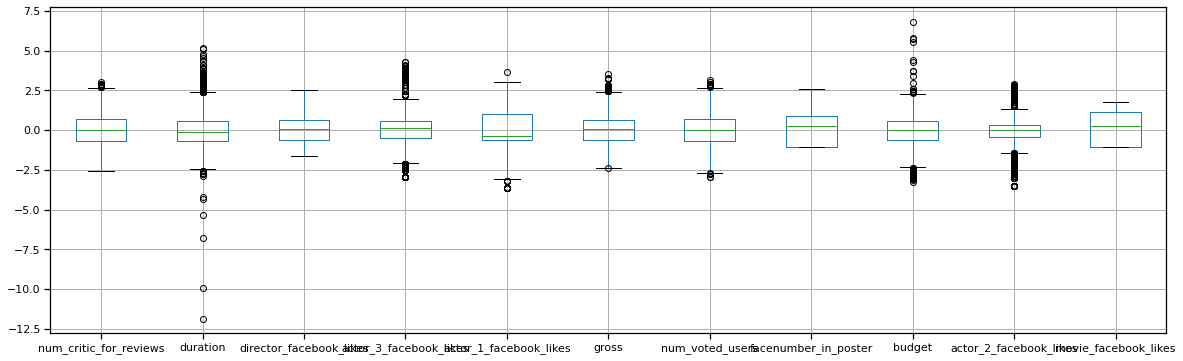

In [ ]:
X_train_pd[['num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes']].boxplot(figsize = (20,6))


#3. Save Datasets

We will perform regression to predict imdb scores in a separate notbook. For now we will save our datasets.

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
X_train_pd.to_csv('X_train_scaled.csv')

In [ ]:
!cp X_train_scaled.csv "gdrive/My Drive/Colab_Notebooks/Projects/IMDB_Rating_Prediction"

In [ ]:
X_test_pd.to_csv('X_test_scaled.csv')

In [ ]:
!cp X_test_scaled.csv "gdrive/My Drive/Colab_Notebooks/Projects/IMDB_Rating_Prediction"

In [ ]:
X_val_pd.to_csv('X_val_scaled.csv')

In [ ]:
!cp X_val_scaled.csv "gdrive/My Drive/Colab_Notebooks/Projects/IMDB_Rating_Prediction"

In [ ]:
y_train_pd.to_csv('y_train_scaled.csv')

In [ ]:
!cp y_train_scaled.csv "gdrive/My Drive/Colab_Notebooks/Projects/IMDB_Rating_Prediction"

In [ ]:
y_test_pd.to_csv('y_test_scaled.csv')

In [ ]:
!cp y_test_scaled.csv "gdrive/My Drive/Colab_Notebooks/Projects/IMDB_Rating_Prediction"

In [ ]:
y_val_pd.to_csv('y_val_scaled.csv')

In [ ]:
!cp y_val_scaled.csv "gdrive/My Drive/Colab_Notebooks/Projects/IMDB_Rating_Prediction"